In [13]:
def newton_interpolation(x, y, u):
  '''
  Parameters
  ----------
  x : list of floats
  y : list of floats
  u : float
  
  Returns
  -------  
  float
      an estimate at the point u
  '''
  g = y[:]
  s = g[0]
  for i in range(len(y)-1):
    g = [(g[j+1]-g[j])/(x[j+i+1]-x[j]) for j in range(len(g)-1)]
    s += g[0] * product(u-x[j] for j in range(i+1))
  return s  

def product(a): 
  p = 1
  for i in a: p *= i
  return p

       .......                      
     ..       ..                    
......         .                    
.....          .                    
     ..       .                     
       .      ............          
     ..                   ......... 
    .                           ... 
   .                           .    
   .                           .    
    .                         .     
     ...                   ...      
        ...................         


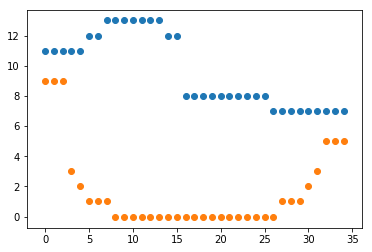

In [110]:
import matplotlib.pyplot as plt
picture = "       .......                      |     ..       ..                    |......         .                    |.....          .                    |     ..       .                     |       .      ............          |     ..                   ......... |    .                           ... |   .                           .    |   .                           .    |    .                         .     |     ...                   ...      |        ...................         "

picturebyLines = picture.split('|')

for line in picturebyLines:
    print (line)

posx = []
posy = []
posxLow = []
posyLow = []
contRand = 0.000001
for i in range(0, len(picturebyLines[0])-1):
  pos = len(picturebyLines)
  for j in picturebyLines:
    if( j[ i ] == '.' ):
      posx.append(float(i) *1.00 + contRand)
      posy.append(float(pos) * 1.00)
      break
      contRand += 0.000000000001
    pos-=1
    
contRand = 0.000001
for i in range(0, len(picturebyLines[0])-1):
  pos = 0
  for j in reversed(picturebyLines):
    if( j[ i ] == '.' ):
      posxLow.append(float(i) *1.00 + contRand)
      posyLow.append(float(pos) * 1.00)
      break
      contRand += 0.000000000001
    pos+=1

# red dashes, blue squares and green triangles
plt.scatter(posx, posy)
plt.scatter(posxLow, posyLow)
plt.show()

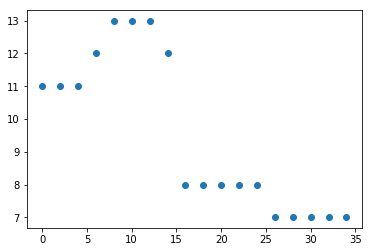

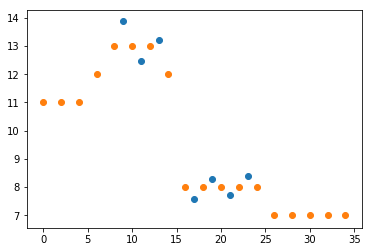

18.0538453463219


In [109]:
interx = []
intery = []

for i in range(0, len(posx)):
    if(int(posx[i]) % 2 == 0):
        interx.append(posx[i])
        intery.append(posy[i])
#print (interx)
#print (intery)
plt.scatter(interx, intery)
plt.show()

testx = []
testy = []
for i in range(4,30):
    if(i % 2 != 0):
        #testx.append(i)
        est = newton_interpolation (interx, intery, i)
        real = posy[i]
        err = abs((real - est) / real)
        #testy.append(abs((real - est) / real))
        if(err <= 0.10):
            testx.append(i)
            testy.append(est)
    
plt.scatter(testx, testy)
plt.scatter(interx, intery)
plt.show()
est = newton_interpolation (interx, intery, 5)
print (est)